/reg/d/psdm/cxi/cxilv0418/scratch/northeyt/xtcav_stats_run43.h5
<HDF5 file "xtcav_stats_run43.h5" (mode r)>
(62778, 128)
[81 77 78 ... 75 81 79]
[48 50 48 ... 50 68 46]
agreement:
[0.75814353 0.88764257 0.77334109 ... 0.8688351  0.8812974  0.84892859]
(62778, 128)
81
79.13129140382196
75.51680525611974
79.11428944572268
30.741092170879888
30.299259032922723
30.1761480396308
agreement = 0.899102
dt = 35.661382


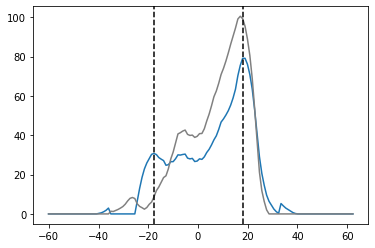

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import sys
sys.path.append('../')
# import my functions
from define_experiment_run import experiment, run, scratch_dir, Nevents

# load h5 file
fname = '%sxtcav_stats_run%d.h5' % (scratch_dir, run)
print(fname)
f = h5py.File(fname, 'r')
print(f)
list(f.keys())
tCOM = f['tCOM'][:]
tRMS = f['tRMS'][:]
powerCOM = f['powerCOM']
powerRMS = f['powerRMS']
print(tCOM.shape)

# only look at COM now...
dt_COM = f['dt_COM']
#print(dt_COM[:])
imax1_COM = f['imax1_COM'][:]
imax2_COM = f['imax2_COM'][:]
print(imax1_COM)
print(imax2_COM)
agreement = f['agreement'][:]
print('agreement:')
print(agreement)

n = 9999
print(tCOM.shape)
print(imax1_COM[n])
plt.plot(tCOM[n, :], powerCOM[n, :])
plt.plot(tRMS[n, :], powerRMS[n, :], color='grey')
plt.axvline(x=tCOM[n, imax1_COM[n]], color='black', linestyle='dashed')
plt.axvline(x=tCOM[n, imax2_COM[n]], color='black', linestyle='dashed')
print(powerCOM[n, imax1_COM[n]]) # correct max for first peak
print(powerCOM[n, imax1_COM[n]-1])
print(powerCOM[n, imax1_COM[n]+1])

print(powerCOM[n, imax2_COM[n]]) # correct max for second peak
print(powerCOM[n, imax2_COM[n]-1])
print(powerCOM[n, imax2_COM[n]+1])

print('agreement = %f' % agreement[n])
print('dt = %f' % dt_COM[n])


In [5]:

tmp = agreement[n:]
nvalid = len(tmp)
print('Equal 0:')
print(np.sum(tmp == 0))
print(np.sum(tmp > 0.9) / nvalid)
print(np.sum(tmp > 0.8) / nvalid)
print(np.sum(tmp > 0.5) / nvalid)

Equal 0:
0
0.3595863935059915
0.8291940471588712
0.9771453420950909


Text(0, 0.5, 'Counts')

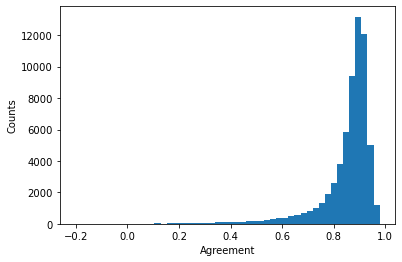

In [10]:
plt.hist(agreement, bins=50)
plt.xlabel('Agreement')
plt.ylabel('Counts')